# 数据读入与数据处理

In [50]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time  
import re 
import requests
import jieba
import jieba.analyse
import os
os.chdir(r'D:\BaiduNetdiskDownload\入海')

from collections import Counter

from pyecharts.charts import Bar, Pie, Line, WordCloud, Page
from pyecharts import options as opts 
from pyecharts.globals import SymbolType

In [11]:
# 读入数据
df = pd.read_csv('D:/BaiduNetdiskDownload/入海/B站评论数据-入海5.23.csv',encoding = 'utf-8')
df.head() 

,user_name,sex,sign,current_level,content,device,content_time,reply_count
0,巨星不易工作室,保密,毛不易个人厂牌-巨星不易工作室官方账号,2,祝大家毕业快乐。,phone,1589947664,1928
1,谜一样的剪辑师,男,职业剪辑师，代表作：《啥是佩奇》《巴依尔的春节》,5,该片剪辑路过~这就是我最近在上海剪的MV短片《入海》，终于上线了哈哈，希望大家喜欢。近几天考...,phone,1589938042,395
2,巨星不易工作室,保密,毛不易个人厂牌-巨星不易工作室官方账号,2,快乐的时光总是短暂，我们下次再见。,phone,1589950537,426
3,同济大学,保密,同舟共济,4,毕业快乐，祝大家前程似锦，母校永远在你身后[爱心][爱心],phone,1589942187,245
4,华东师范大学,保密,华东师范大学，魔都985双一流A类高校。人称“爱在华师大”，又名“华东吃饭大学”、“东中国正...,5,祝所有毕业生前程似锦，万事胜意❤,NaN,1589938758,244


In [12]:
df.shape

(19099, 8)

In [13]:
# 转换类型
df['content'] = [str(i) for i in df.content] 

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19099 entries, 0 to 19098
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_name      19099 non-null  object
 1   sex            19099 non-null  object
 2   sign           9896 non-null   object
 3   current_level  19099 non-null  int64 
 4   content        19099 non-null  object
 5   device         4159 non-null   object
 6   content_time   19099 non-null  int64 
 7   reply_count    19099 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


数据集有19099个样本，8个字段，名称为：用户名、用户性别、用户签名、用户等级、用户评论、设备名称、评论时间、点赞数

In [15]:
# 定义转换时间
def transform_timestamp(time_second):
    timeArray = time.gmtime(time_second) 
    otherStyleTime = time.strftime('%Y-%m-%d %H:%M:%S', timeArray) 
    return otherStyleTime

# 提取时间
df['content_time'] = df['content_time'].apply(lambda x:transform_timestamp(x))
df.head()

,user_name,sex,sign,current_level,content,device,content_time,reply_count
0,巨星不易工作室,保密,毛不易个人厂牌-巨星不易工作室官方账号,2,祝大家毕业快乐。,phone,2020-05-20 04:07:44,1928
1,谜一样的剪辑师,男,职业剪辑师，代表作：《啥是佩奇》《巴依尔的春节》,5,该片剪辑路过~这就是我最近在上海剪的MV短片《入海》，终于上线了哈哈，希望大家喜欢。近几天考...,phone,2020-05-20 01:27:22,395
2,巨星不易工作室,保密,毛不易个人厂牌-巨星不易工作室官方账号,2,快乐的时光总是短暂，我们下次再见。,phone,2020-05-20 04:55:37,426
3,同济大学,保密,同舟共济,4,毕业快乐，祝大家前程似锦，母校永远在你身后[爱心][爱心],phone,2020-05-20 02:36:27,245
4,华东师范大学,保密,华东师范大学，魔都985双一流A类高校。人称“爱在华师大”，又名“华东吃饭大学”、“东中国正...,5,祝所有毕业生前程似锦，万事胜意❤,NaN,2020-05-20 01:39:18,244


## 数据可视化

**评论用户性别占比**

In [16]:
# 总体评分分布
sex_num = df['sex'].value_counts()
sex_num.drop('保密', inplace=True) 
print(sex_num) 

男    4537
女    3759
Name: sex, dtype: int64


使用matplotlib绘制饼图

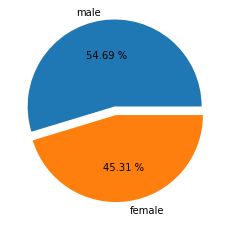

In [27]:
#绘制饼图
plt.figure(figsize = (4,4))
plt.pie(sex_num, autopct = '%.2f %%',explode=[0.1,0],labels = ['male','female'])
plt.show()

使用pyecharts绘制饼图

In [118]:
# 绘制饼图
data_pair =  [list(z) for z in zip(sex_num.index.tolist(), sex_num.values.tolist())]

# 绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
pie1.add('', data_pair, radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='评论用户性别占比'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#EF9050', '#3B7BA9', '#6FB27C'])
pie1.render()

'D:\\BaiduNetdiskDownload\\入海\\render.html'

使用pyecharts绘制水球图

In [116]:
from pyecharts import options as opts
from pyecharts.charts import Liquid, Page
from pyecharts.globals import SymbolType
def liquid() -> Liquid:
    c = (
        Liquid()
        .add("lq", [0.5469, 0.4531])
        .set_global_opts(title_opts=opts.TitleOpts(title="Liquid"))
    )
    return c


liquid().render('.liquid.html')

'D:\\BaiduNetdiskDownload\\入海\\.liquid.html'

**评论用户客户端分布**

In [28]:
device_num = df.device.value_counts(ascending=True) 
device_num 

unknown      57
pad         453
android     753
phone      2896
Name: device, dtype: int64

使用matplotlib绘制直方图

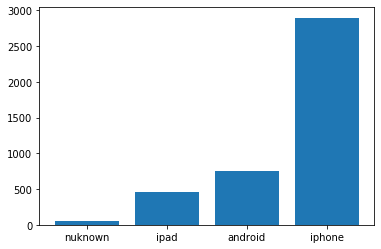

In [101]:
#绘制直方图
plt.bar(range(len(device_num)),device_num)
plt.xticks(range(len(device_num)),['nuknown','ipad','android','iphone'])
plt.show()

使用pyecharts绘制直方图

In [72]:
# 直方图
bar1 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar1.add_xaxis(device_num.index.tolist())
bar1.add_yaxis('', device_num.values.tolist(), 
               label_opts=opts.LabelOpts(position='right'))
bar1.set_global_opts(title_opts=opts.TitleOpts(title='评论客户端分布'), 
                     visualmap_opts=opts.VisualMapOpts(max_=3000))
bar1.reversal_axis()
bar1.render() 

'D:\\BaiduNetdiskDownload\\入海\\render.html'

**评论用户等级分布**

In [42]:
level_num = df.current_level.value_counts()
level_num

5    6894
4    5026
3    3547
2    3013
6     619
Name: current_level, dtype: int64

使用matplotlib绘制饼图

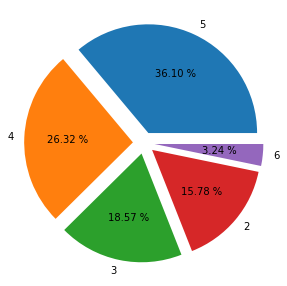

In [45]:
#绘制饼图
plt.figure(figsize = (5,5))
plt.pie(level_num, autopct = '%.2f %%',explode=[0.1,0.1,0.1,0.1,0.1],labels = ['5','4','3','2','6'])
plt.show()

使用pyecharts绘制饼图

In [76]:
data_pair2 =  [list(z) for z in zip(['LV' + i for i in level_num.index.astype('str').tolist()] , level_num.values.tolist())]

# 绘制饼图
pie2 = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
pie2.add('', data_pair=data_pair2, radius=['35%', '60%'])
pie2.set_global_opts(title_opts=opts.TitleOpts(title='评论用户等级分布'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie2.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}({d}%)"))
pie2.set_colors(['#EF9050', '#3B7BA9', '#6FB27C', '#FFAF34'])
pie2.render()

'D:\\BaiduNetdiskDownload\\入海\\render.html'

**各时段评论人数**

In [46]:
df['time'] = df.content_time.str.split('-').str[1] + '-' + df.content_time.str.split('-').str[2]
df.head(2) 

,user_name,sex,sign,current_level,content,device,content_time,reply_count,time
0,巨星不易工作室,保密,毛不易个人厂牌-巨星不易工作室官方账号,2,祝大家毕业快乐。,phone,2020-05-20 04:07:44,1928,05-20 04:07:44
1,谜一样的剪辑师,男,职业剪辑师，代表作：《啥是佩奇》《巴依尔的春节》,5,该片剪辑路过~这就是我最近在上海剪的MV短片《入海》，终于上线了哈哈，希望大家喜欢。近几天考...,phone,2020-05-20 01:27:22,395,05-20 01:27:22


In [47]:
df['time'] = df.time.str.split(':').str[0]

In [48]:
time_num = df.time.value_counts().sort_index()
time_num[:5]

05-20 00    1277
05-20 01    1433
05-20 02    1229
05-20 03    1333
05-20 04    2772
Name: time, dtype: int64

# 评论时间走势图——小时

In [119]:
# 产生数据
x1_line1 = time_num.index.values.astype('str').tolist()
y1_line1 = time_num.values.tolist() 

# 绘制面积图
line1 = Line(init_opts=opts.InitOpts(width='1350px', height='750px'))
line1.add_xaxis(x1_line1)
line1.add_yaxis('', y1_line1, areastyle_opts=opts.AreaStyleOpts(opacity=0.3),
                markpoint_opts=opts.MarkPointOpts(data=[
                    opts.MarkPointItem(type_='max', name='最大值')
                ])) 
line1.set_global_opts(title_opts=opts.TitleOpts('各个时段评论人数'), 
                      xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate='30'))
                     ) 
line1.set_series_opts(label_opts=opts.LabelOpts(is_show=False), 
                      axisline_opts=opts.AxisLineOpts()
                     )
line1.render()



'D:\\BaiduNetdiskDownload\\入海\\render.html'

**评论高频词**

In [63]:
# 整体内容分析
def get_top_words(txt):
    # 读入停用词表
    stop_words = [] 
    
    with open(r"D:/BaiduNetdiskDownload/入海/stopword.txt", 'r') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    
    # 添加关键词
    my_words = ['毛不易', '跃入人海', '步入人海', '打call']
    
    for i in my_words:
        jieba.add_word(i) 

    # 添加停用词
    stop_words.extend(['毛毛', '不易', '毛不易', '啊啊啊', '真的', '首歌', '老师', '毛老师',
                      '\n\n', 'doge', '哈哈哈', '一首', 'tv', 'MV', 'mv', '跃入', '人海','。',']','[',']。','。。','！。',']['])               

    # 评论字段分词处理
    word_num = jieba.lcut(txt, cut_all=True)
    
    # 筛选词
    word_num_selected = []
    
    for i in word_num:
        if i not in stop_words and len(i)>=2:
            word_num_selected.append(i)

     # 计数    
    key_words = pd.Series(Counter(word_num_selected))
    return key_words

**评论关键词TOP15**

In [64]:
txt1 = df['content'].str.cat(sep='。')

key_words = get_top_words(txt1)
key_words = key_words.sort_values(ascending=False)
key_words.head() 

毕业    6988
后浪    2293
快乐    1941
入海    1804
大哭    1512
dtype: int64

将评论关键词TOP15绘制成直方图

In [65]:
top15 = key_words.head(15) 

bar2 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar2.add_xaxis(top15.index.tolist())
bar2.add_yaxis("", top15.values.tolist(), category_gap='5%')
bar2.set_global_opts(title_opts=opts.TitleOpts(title="评论关键词Top15"), 
                     visualmap_opts=opts.VisualMapOpts(max_=5000)
                    )
bar2.render() 

'D:\\BaiduNetdiskDownload\\入海\\render.html'

**绘制评论词云图**

In [68]:
word1 = WordCloud(init_opts=opts.InitOpts(width='1350px', height='750px'))
word1.add("", [*zip(key_words[:100].index.tolist(), key_words[:100].values.tolist())],
          word_size_range=[20, 100],
          shape=SymbolType.DIAMOND) 
word1.set_global_opts(title_opts=opts.TitleOpts('评论词云图'))
word1.render() 

'D:\\BaiduNetdiskDownload\\入海\\render.html'

In [77]:
page = Page()
page.add(pie1, bar1, pie2, line1, bar2, word1)
page.render('入海B站数据分析.html')

'D:\\BaiduNetdiskDownload\\入海\\入海B站数据分析.html'

In [79]:
# 读入停用词表
stop_words = [] 

with open(r"D:/BaiduNetdiskDownload/入海/stopword.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.strip())

# 添加关键词
my_words = ['毛不易', '跃入人海', '步入人海', '打call', '前程似锦', 'bilibili']

for i in my_words:
    jieba.add_word(i) 

# 添加停用词
stop_words.extend(['毛毛', '不易', '毛不易', '啊啊啊', '真的', '首歌', '老师', '毛老师',
                  '\n\n', 'doge', '哈哈哈', '一首', 'tv', 'MV', 'mv', '跃入', '人海',
                   '业生', '生前', '前程', '似锦', '一朵','一站','。。'
                  ])               

# 评论字段分词处理
word_num = jieba.lcut(df['content'].str.cat(sep='。'), cut_all=True)

# 筛选词
word_num_selected = []

for i in word_num:
    if i not in stop_words and len(i)>=2:
        word_num_selected.append(i)
        
word_num_selected[:5]

['毕业', '快乐', '该片', '剪辑', '路过']

In [95]:
# 修饰
word_num_selected = [i.strip() for i in word_num_selected]
word_num_selected[:5] 
selected1 =  word_num_selected[:100]

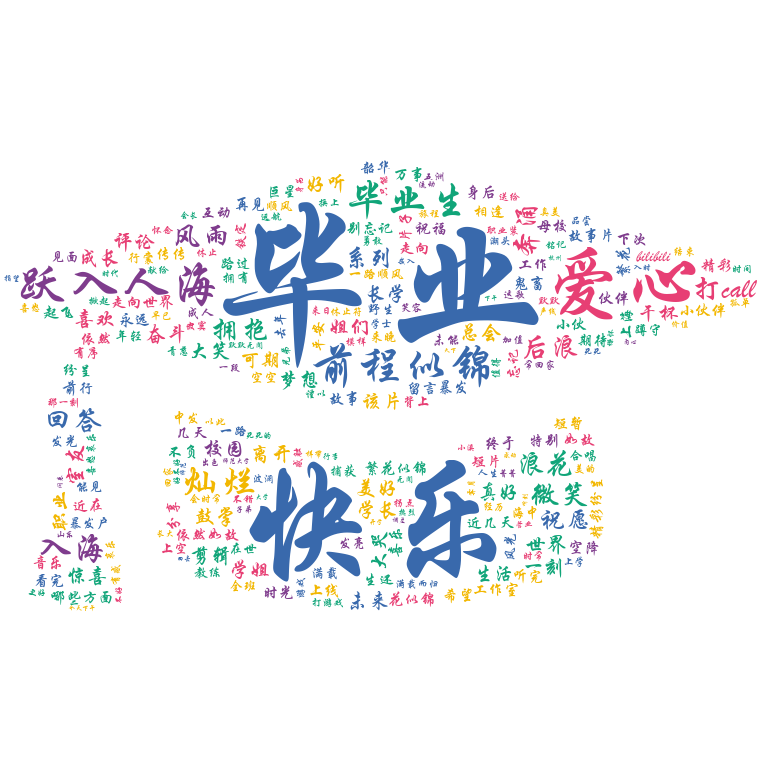

In [99]:
import stylecloud
from IPython.display import Image # 用于在jupyter lab中显示本地图片

stylecloud.gen_stylecloud(text=' '.join(word_num_selected[:500]), 
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\STXINGKA.TTF',
                          icon_name='fas fa-graduation-cap',
                          size=768,
                          output_name='B站评论词云图.png')
Image(filename='B站评论词云图.png') 